In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2024-03-29 16:06:13.111313: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-29 16:06:13.137419: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2110848/2110848 [==============================] - 11s 5us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
one_hot_train_labels.shape

(8982, 46)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
one_hot_train_labels.shape

(8982, 46)

In [13]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

2024-03-29 16:12:56.398810: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-29 16:12:56.414778: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-29 16:12:56.414903: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [14]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20


2024-03-29 16:13:25.597538: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-03-29 16:13:25.686045: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7017100395a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-29 16:13:25.686114: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Ti, Compute Capability 8.9
2024-03-29 16:13:25.739601: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-29 16:13:25.832197: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-03-29 16:13:25.985455: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-29 16:13:26.09

16/16 [==============================] - 1s 15ms/step - loss: 2.7867 - accuracy: 0.4783 - val_loss: 1.8625 - val_accuracy: 0.6070
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 1.5748 - accuracy: 0.6812 - val_loss: 1.4077 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 0s 6ms/step - loss: 1.2066 - accuracy: 0.7471 - val_loss: 1.2039 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 0.9883 - accuracy: 0.7930 - val_loss: 1.0950 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: 0.8192 - accuracy: 0.8299 - val_loss: 1.0294 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6888 - accuracy: 0.8533 - val_loss: 0.9728 - val_accuracy: 0.7960
Epoch 7/20
16/16 [==============================] - 0s 6ms/step - loss: 0.5779 - accuracy: 0.8779 - val_loss: 0.9414 - val_accuracy: 0.7970
Epoch 8/20
16/16 [============

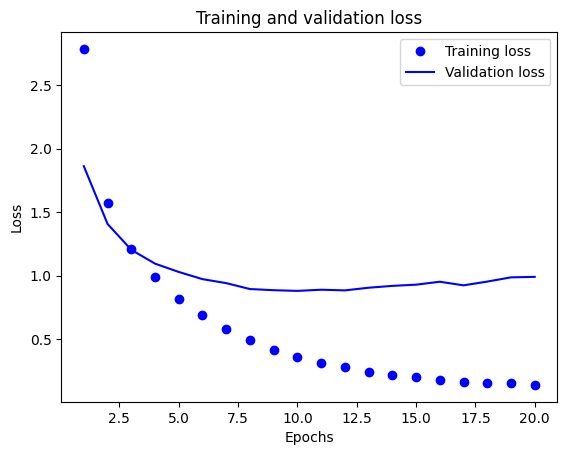

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

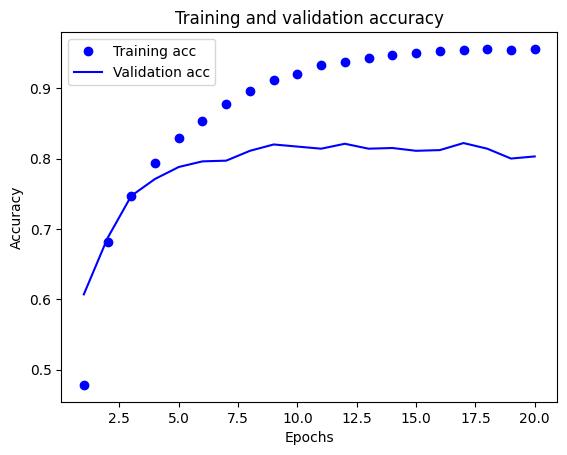

In [21]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
m = max(history.history['val_accuracy'])
for i, v in enumerate(history.history['val_accuracy']):
    print(i, v)
    if v == m:
        print(i)

0 0.6069999933242798
1 0.6869999766349792
2 0.746999979019165
3 0.7710000276565552
4 0.7879999876022339
5 0.7960000038146973
6 0.796999990940094
7 0.8109999895095825
8 0.8199999928474426
9 0.8169999718666077
10 0.8140000104904175
11 0.8209999799728394
12 0.8140000104904175
13 0.8149999976158142
14 0.8109999895095825
15 0.8119999766349792
16 0.8220000267028809
16
17 0.8140000104904175
18 0.800000011920929
19 0.8029999732971191


In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=16,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/16
16/16 [==============================] - 1s 12ms/step - loss: 2.8033 - accuracy: 0.5078 - val_loss: 1.9277 - val_accuracy: 0.6160
Epoch 2/16
16/16 [==============================] - 0s 7ms/step - loss: 1.6002 - accuracy: 0.6763 - val_loss: 1.4162 - val_accuracy: 0.6980
Epoch 3/16
16/16 [==============================] - 0s 7ms/step - loss: 1.2065 - accuracy: 0.7379 - val_loss: 1.1881 - val_accuracy: 0.7370
Epoch 4/16
16/16 [==============================] - 0s 6ms/step - loss: 0.9817 - accuracy: 0.7881 - val_loss: 1.0688 - val_accuracy: 0.7600
Epoch 5/16
16/16 [==============================] - 0s 6ms/step - loss: 0.8141 - accuracy: 0.8245 - val_loss: 0.9831 - val_accuracy: 0.7980
Epoch 6/16
16/16 [==============================] - 0s 6ms/step - loss: 0.6778 - accuracy: 0.8578 - val_loss: 0.9387 - val_accuracy: 0.7950
Epoch 7/16
16/16 [==============================] - 0s 7ms/step - loss: 0.5654 - accuracy: 0.8807 - val_loss: 0.8788 - val_accuracy: 0.8100
Epoch 8/16
16/16 [=

In [31]:
results

[0.9947158694267273, 0.792965292930603]

In [32]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18744434550311664

In [33]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 837us/step


In [34]:
predictions.shape

(2246, 46)

In [35]:
predictions[0]

array([1.08293452e-05, 1.12706596e-06, 9.24490962e-07, 9.87341106e-01,
       1.13013145e-02, 1.13621752e-06, 1.48323970e-05, 4.16739067e-06,
       2.39794274e-04, 2.66289067e-06, 3.27577909e-05, 1.19789020e-05,
       6.45358114e-07, 3.63039086e-04, 7.48793082e-06, 1.77533684e-06,
       8.28295160e-05, 1.37849167e-06, 3.50693313e-06, 1.24723781e-04,
       2.35050873e-04, 1.40252178e-05, 3.67382370e-07, 2.70725877e-06,
       1.04992544e-07, 6.56969587e-06, 5.53155473e-07, 1.48896765e-06,
       3.67948837e-06, 3.60076338e-05, 5.43096621e-06, 8.26320684e-06,
       2.66983807e-06, 6.62248567e-06, 7.43331657e-06, 8.30239856e-07,
       2.06969544e-05, 2.33522132e-06, 7.28339671e-07, 5.12431470e-05,
       1.67432191e-07, 3.11568074e-05, 1.24881299e-05, 8.74870665e-09,
       5.05710432e-07, 7.39276174e-07], dtype=float32)

In [36]:
np.sum(predictions[0])

0.99999994

In [37]:
np.argmax(predictions[0])

3